In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Data Pre- Processing</h2>

In [2]:
metrics = pd.read_csv("metrics.csv")

In [3]:
metrics.head()

,athlete_id,date,metric,value
0,1,2016-05-01,hip_mobility,36
1,1,2016-05-02,hip_mobility,36
2,1,2016-05-03,hip_mobility,56
3,1,2016-05-04,hip_mobility,24
4,1,2016-05-05,hip_mobility,35


In [4]:
metrics.describe(include='all')

,athlete_id,date,metric,value
count,43800.00000,43800,43800,43800.000000
unique,NaN,730,2,NaN
top,NaN,2016-05-01,hip_mobility,NaN
freq,NaN,60,21900,NaN
mean,15.50000,NaN,NaN,124.974338
std,8.65554,NaN,NaN,107.841666
min,1.00000,NaN,NaN,-108.000000
25%,8.00000,NaN,NaN,39.000000
50%,15.50000,NaN,NaN,56.000000
75%,23.00000,NaN,NaN,213.000000


In [5]:
metrics.dtypes

athlete_id     int64
date          object
metric        object
value          int64
dtype: object

In [6]:
metrics['date'] = metrics['date'].astype('datetime64[ns]')
metrics.dtypes

athlete_id             int64
date          datetime64[ns]
metric                object
value                  int64
dtype: object

In [7]:
workload = pd.read_csv("game_workload.csv")

In [8]:
workload.head()

,athlete_id,date,game_workload
0,1,2016-05-05,402
1,1,2016-05-08,365
2,1,2016-05-11,457
3,1,2016-05-16,405
4,1,2016-05-20,407


In [9]:
workload.describe(include='all')

,athlete_id,date,game_workload
count,2400.000000,2400,2400.000000
unique,NaN,706,NaN
top,NaN,2017-05-22,NaN
freq,NaN,9,NaN
mean,15.649167,NaN,400.481667
std,8.735438,NaN,47.991824
min,1.000000,NaN,225.000000
25%,8.000000,NaN,368.000000
50%,16.000000,NaN,400.000000
75%,23.000000,NaN,433.250000


In [10]:
workload['date'] = workload['date'].astype('datetime64[ns]')
workload.dtypes

athlete_id                int64
date             datetime64[ns]
game_workload             int64
dtype: object

In [11]:
injuries = pd.read_csv("injuries.csv")

In [12]:
injuries.head()

,athlete_id,date
0,1,2016-05-11
1,1,2016-05-16
2,1,2016-07-28
3,1,2016-11-11
4,1,2016-12-16


In [13]:
injuries.describe(include = 'all')

,athlete_id,date
count,137.000000,137
unique,NaN,126
top,NaN,2016-05-16
freq,NaN,4
mean,15.605839,NaN
std,9.653068,NaN
min,1.000000,NaN
25%,6.000000,NaN
50%,18.000000,NaN
75%,24.000000,NaN


In [14]:
injuries['date'] = injuries['date'].astype('datetime64[ns]')
injuries.dtypes

athlete_id             int64
date          datetime64[ns]
dtype: object

In [15]:
"""Creating a new column named injury with all values as yes"""
injuries["injury"] = "Yes"

In [16]:
injuries.head()

,athlete_id,date,injury
0,1,2016-05-11,Yes
1,1,2016-05-16,Yes
2,1,2016-07-28,Yes
3,1,2016-11-11,Yes
4,1,2016-12-16,Yes


In [17]:
"""Merging the workload and injuries dataframes"""
games_data = pd.merge(workload,injuries,  how='left', left_on=['athlete_id','date'], right_on = ['athlete_id','date'])

In [18]:
"""Replacing the NANs with No as the value in injury column"""
games_data["injury"].fillna("No", inplace = True)
#playersData["game_workload"].fillna(0, inplace = True)


C:\Users\hp\AppData\Local\Temp\ipykernel_4324\183131121.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games_data["injury"].fillna("No", inplace = True)


Created a new column for recording the injury on the days games were played (as indicated by workload)

In [19]:
games_data.head()

,athlete_id,date,game_workload,injury
0,1,2016-05-05,402,No
1,1,2016-05-08,365,No
2,1,2016-05-11,457,Yes
3,1,2016-05-16,405,Yes
4,1,2016-05-20,407,No


In [20]:
metrics.head()

,athlete_id,date,metric,value
0,1,2016-05-01,hip_mobility,36
1,1,2016-05-02,hip_mobility,36
2,1,2016-05-03,hip_mobility,56
3,1,2016-05-04,hip_mobility,24
4,1,2016-05-05,hip_mobility,35


In [21]:
"""Recording metric type as two seperate columns i.e transposing the groin_squeeze and hip_mobility rows into columns"""
new_metrics_df = metrics.pivot_table('value', ['athlete_id', 'date'], 'metric').reset_index()

In [22]:
new_metrics_df.head()

metric,athlete_id,date,groin_squeeze,hip_mobility
0,1,2016-05-01,297.0,36.0
1,1,2016-05-02,274.0,36.0
2,1,2016-05-03,291.0,56.0
3,1,2016-05-04,260.0,24.0
4,1,2016-05-05,284.0,35.0


In [23]:
new_metrics_df.shape

(21900, 4)

In [24]:
"""Merging the necessary columns from all the tables into one final dataframe for further analysis"""
final_data = pd.merge(games_data,new_metrics_df,  how='left', left_on=['athlete_id','date'], right_on = ['athlete_id','date'])

In [25]:
final_data.shape

(2400, 6)

In [26]:
final_data.head()

,athlete_id,date,game_workload,injury,groin_squeeze,hip_mobility
0,1,2016-05-05,402,No,284.0,35.0
1,1,2016-05-08,365,No,250.0,41.0
2,1,2016-05-11,457,Yes,331.0,33.0
3,1,2016-05-16,405,Yes,260.0,38.0
4,1,2016-05-20,407,No,378.0,60.0


Creating new column named <b>rest_period</b> i.e difference between two consecutive games played by a player

In [27]:
final_data['rest_period'] = final_data.groupby('athlete_id')['date'].diff()

In [28]:
final_data.head()

,athlete_id,date,game_workload,injury,groin_squeeze,hip_mobility,rest_period
0,1,2016-05-05,402,No,284.0,35.0,NaT
1,1,2016-05-08,365,No,250.0,41.0,3 days
2,1,2016-05-11,457,Yes,331.0,33.0,3 days
3,1,2016-05-16,405,Yes,260.0,38.0,5 days
4,1,2016-05-20,407,No,378.0,60.0,4 days


Since the data for all the players was given from the date 2016-05-01, the resting period for the first game played by each player is taken as the difference between their first game and the date 2016-05-01.

In [29]:
first_day = '2016-05-01'
date_object = pd.to_datetime(first_day)

In [30]:
final_data["rest_period"].fillna(final_data['date'] - date_object, inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4324\3327428391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data["rest_period"].fillna(final_data['date'] - date_object, inplace = True)


In [31]:
final_data.head()

,athlete_id,date,game_workload,injury,groin_squeeze,hip_mobility,rest_period
0,1,2016-05-05,402,No,284.0,35.0,4 days
1,1,2016-05-08,365,No,250.0,41.0,3 days
2,1,2016-05-11,457,Yes,331.0,33.0,3 days
3,1,2016-05-16,405,Yes,260.0,38.0,5 days
4,1,2016-05-20,407,No,378.0,60.0,4 days


In [32]:
# final_data['rest_period'].dtype
final_data.dtypes

athlete_id                 int64
date              datetime64[ns]
game_workload              int64
injury                    object
groin_squeeze            float64
hip_mobility             float64
rest_period      timedelta64[ns]
dtype: object

In [33]:
"""Converting the column into day format"""
final_data['rest_period'] = final_data['rest_period'] / np.timedelta64(1, 'D')

In [34]:
final_data.head()

,athlete_id,date,game_workload,injury,groin_squeeze,hip_mobility,rest_period
0,1,2016-05-05,402,No,284.0,35.0,4.0
1,1,2016-05-08,365,No,250.0,41.0,3.0
2,1,2016-05-11,457,Yes,331.0,33.0,3.0
3,1,2016-05-16,405,Yes,260.0,38.0,5.0
4,1,2016-05-20,407,No,378.0,60.0,4.0


In [35]:
final_data['injury'] = final_data['injury'].map({'Yes': 1, 'No': 0})


In [36]:
"""Checking for correlation between the attributes (columns)"""
final_data.corr()

,athlete_id,date,game_workload,injury,groin_squeeze,hip_mobility,rest_period
athlete_id,1.000000,-0.006656,-0.030159,-0.001221,-0.051175,-0.014437,-0.016292
date,-0.006656,1.000000,-0.009440,-0.009742,-0.019158,0.034003,0.017847
game_workload,-0.030159,-0.009440,1.000000,-0.003555,-0.022571,0.000956,-0.023001
injury,-0.001221,-0.009742,-0.003555,1.000000,0.032017,0.002212,-0.109444
groin_squeeze,-0.051175,-0.019158,-0.022571,0.032017,1.000000,-0.001996,0.039563
hip_mobility,-0.014437,0.034003,0.000956,0.002212,-0.001996,1.000000,0.006614
rest_period,-0.016292,0.017847,-0.023001,-0.109444,0.039563,0.006614,1.000000


<h2> Statistical Analysis</h2>

Preparing the dataframe for statistical analysis/ machine learning by adding/removing the categorical variables.

In [37]:

final_data = final_data[['injury','athlete_id','date','game_workload','groin_squeeze','hip_mobility','rest_period']]

In [38]:
final_data.head()

,injury,athlete_id,date,game_workload,groin_squeeze,hip_mobility,rest_period
0,0,1,2016-05-05,402,284.0,35.0,4.0
1,0,1,2016-05-08,365,250.0,41.0,3.0
2,1,1,2016-05-11,457,331.0,33.0,3.0
3,1,1,2016-05-16,405,260.0,38.0,5.0
4,0,1,2016-05-20,407,378.0,60.0,4.0


In [39]:
ready_data=final_data

In [40]:
ready_data.head()

,injury,athlete_id,date,game_workload,groin_squeeze,hip_mobility,rest_period
0,0,1,2016-05-05,402,284.0,35.0,4.0
1,0,1,2016-05-08,365,250.0,41.0,3.0
2,1,1,2016-05-11,457,331.0,33.0,3.0
3,1,1,2016-05-16,405,260.0,38.0,5.0
4,0,1,2016-05-20,407,378.0,60.0,4.0


In [41]:
ready_data.drop('athlete_id', axis = 1, inplace= True)
ready_data.drop('date', axis = 1, inplace = True)

In [42]:
ready_data.head()

,injury,game_workload,groin_squeeze,hip_mobility,rest_period
0,0,402,284.0,35.0,4.0
1,0,365,250.0,41.0,3.0
2,1,457,331.0,33.0,3.0
3,1,405,260.0,38.0,5.0
4,0,407,378.0,60.0,4.0


In [43]:
# Saving final  data
ready_data.to_csv('final_data.csv', index=False)

In [44]:
"""Assiging the dependent variable (0 0r 1 to be predicted as class)"""
y = ready_data.loc[:,'injury'].values

In [45]:
"""required for stats model only"""
y = y.reshape(-1,1)

In [46]:
y.shape

(2400, 1)

In [47]:
X = ready_data.iloc[:, 1:35 ].values

In [48]:
X.shape

(2400, 4)

In [49]:
"""Applying Logistic Regression model to identify the impacting variables using Maximum Liklehood and P-values"""
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.210818
         Iterations 8
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.037     
Date:               2024-11-19 22:19 AIC:              1019.9250 
No. Observations:   2400             BIC:              1043.0579 
Df Model:           3                Log-Likelihood:   -505.96   
Df Residuals:       2396             LL-Null:          -525.28   
Converged:          1.0000           LLR p-value:      2.0789e-08
No. Iterations:     8.0000           Scale:            1.0000    
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.0048      0.0009    -5.2413    0.0000    -0.0066    -0.0030
x2     0.0010      0.0009     1.0976    0.2724    -0.0

In [50]:
"""Applying ststs model to identify the impacting variables using ordinary Leasts square method for p-value"""
import statsmodels.api as sm
logit_model=sm.OLS(y,X)
result=logit_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.067    
Dependent Variable:     y                AIC:                         -223.6837
Date:                   2024-11-19 22:19 BIC:                         -200.5508
No. Observations:       2400             Log-Likelihood:              115.84   
Df Model:               4                F-statistic:                 44.18    
Df Residuals:           2396             Prob (F-statistic):          7.81e-36 
R-squared (uncentered): 0.069            Scale:                       0.053251 
------------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1           0.0001        0.0000       2.2428      0.0250       0.0000       0.0002
x2           0.0001        0.0000       2.24

<h2>Balancing the classes in the dataset</h2>

In [51]:
"""From exploratory data analysis we know that there are only 137 injured cases out of 2400.
Therefore, we will use over sampling technique to increase the injured cases 
and hence bringing the balance between both the categoreies in the dataset"""

'From exploratory data analysis we know that there are only 137 injured cases out of 2400.\nTherefore, we will use over sampling technique to increase the injured cases \nand hence bringing the balance between both the categoreies in the dataset'

Text(0, 0.5, 'Resting_days')

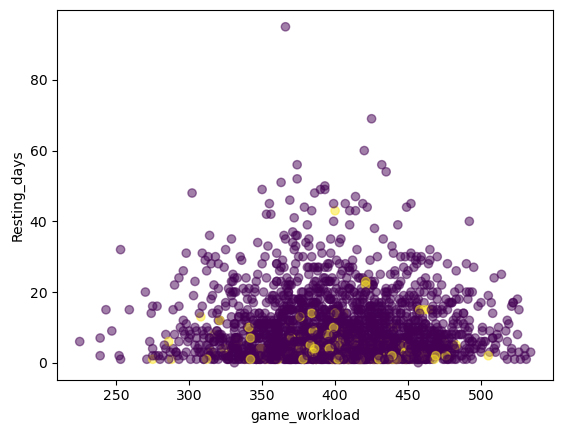

In [52]:
"""Visualising the data in form of number of cases in each class"""
plt.scatter(ready_data['game_workload'], ready_data['rest_period'],
            alpha=0.5, c=ready_data.injury, cmap='viridis', label = np.unique(ready_data.injury))
plt.xlabel("game_workload")
plt.ylabel("Resting_days")

In [63]:
"""Applying oversampling technique using Synthetic Minority Oversampling Technique"""
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_new, y_new = oversample.fit_resample(X, y)
# X_new=X
# y_new=y

In [64]:
X_new.shape

(4526, 4)

Text(0, 0.5, 'Resting_days')

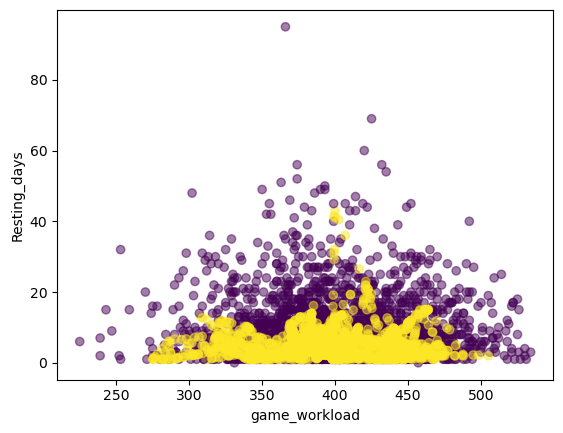

In [65]:
"""plotting the classes after over sampling the minority class"""
plt.scatter(X_new[:,0], X_new[:,3],
            alpha=0.5, c=y_new, cmap='viridis', label = np.unique(ready_data.injury))
plt.xlabel("game_workload")
plt.ylabel("Resting_days")

In [66]:
"""Applying ststs model to identify the impacting variables after balancing the classes"""
import statsmodels.api as sm
logit_model=sm.Logit(y_new,X_new)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.634217
         Iterations 6
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.085      
Date:               2024-11-19 22:20 AIC:              5748.9308  
No. Observations:   4526             BIC:              5774.6011  
Df Model:           3                Log-Likelihood:   -2870.5    
Df Residuals:       4522             LL-Null:          -3137.2    
Converged:          1.0000           LLR p-value:      2.7028e-115
No. Iterations:     6.0000           Scale:            1.0000     
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1     0.0006      0.0003      1.7538    0.0795    -0.0001     0.0013
x2     0.0022      0.0003      6.4362    

In [67]:
"""Applying ststs model to identify the impacting variables using ordinary Least square method"""
import statsmodels.api as sm
logit_model=sm.OLS(y_new,X_new)
result=logit_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.542    
Dependent Variable:     y                AIC:                         6180.3802
Date:                   2024-11-19 22:20 BIC:                         6206.0506
No. Observations:       4526             Log-Likelihood:              -3086.2  
Df Model:               4                F-statistic:                 1338.    
Df Residuals:           4522             Prob (F-statistic):          0.00     
R-squared (uncentered): 0.542            Scale:                       0.22918  
------------------------------------------------------------------------------------
            Coef.       Std.Err.         t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1          0.0010        0.0001       12.6420      0.0000       0.0008       0.0011
x2          0.0006        0.0001        8.47

<h2>Building a classifier</h2>

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=0)

Accuracy of logistic regression classifier on test set: 0.64
[[353 340]
 [152 513]]
              precision    recall  f1-score   support

           0       0.70      0.51      0.59       693
           1       0.60      0.77      0.68       665

    accuracy                           0.64      1358
   macro avg       0.65      0.64      0.63      1358
weighted avg       0.65      0.64      0.63      1358



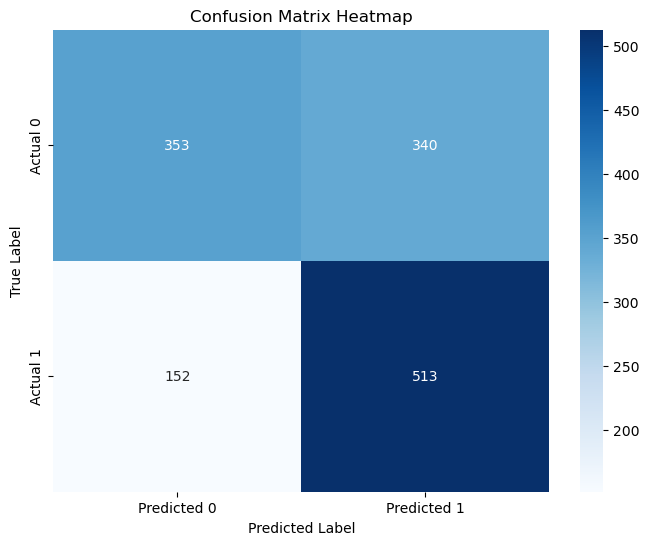

In [73]:
"""Using Logistic Regression Classifer"""
import seaborn as sns
from sklearn.linear_model import LogisticRegression
logitic_regressor = LogisticRegression()
logitic_regressor.fit(X_train, y_train)
y_pred = logitic_regressor.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logitic_regressor.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
#plot
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

Accuracy of Decision Tree classifier on test set: 0.90
[[626  67]
 [ 64 601]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       693
           1       0.90      0.90      0.90       665

    accuracy                           0.90      1358
   macro avg       0.90      0.90      0.90      1358
weighted avg       0.90      0.90      0.90      1358



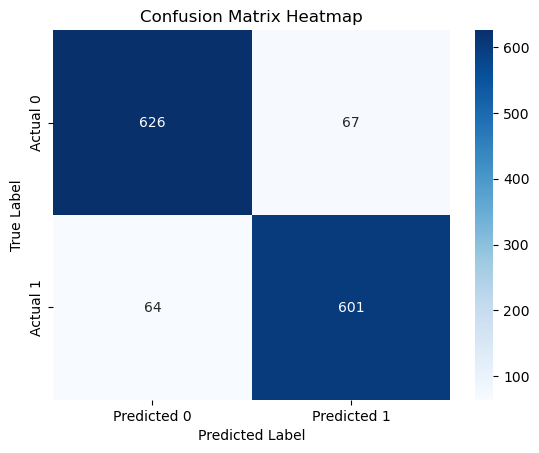

In [74]:
"""Using Decision Tree Classifer"""
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))
#plot
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

Accuracy of Knn classifier on test set: 0.85
[[510 183]
 [ 25 640]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       693
           1       0.78      0.96      0.86       665

    accuracy                           0.85      1358
   macro avg       0.87      0.85      0.85      1358
weighted avg       0.87      0.85      0.85      1358



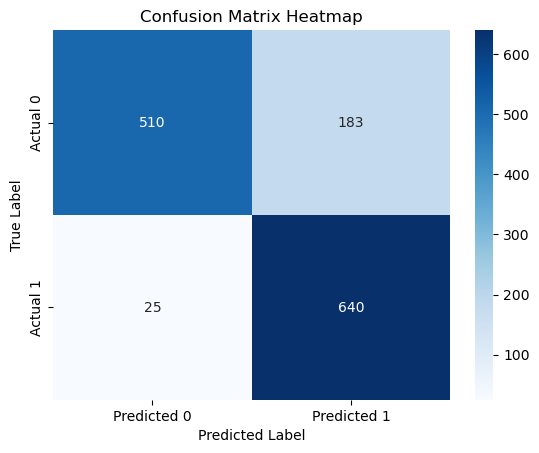

In [75]:
"""Using KNN Classifer"""
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy of Knn classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

Accuracy of Support Vector classifier on test set: 0.86
[[689   4]
 [190 475]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88       693
           1       0.99      0.71      0.83       665

    accuracy                           0.86      1358
   macro avg       0.89      0.85      0.85      1358
weighted avg       0.89      0.86      0.85      1358



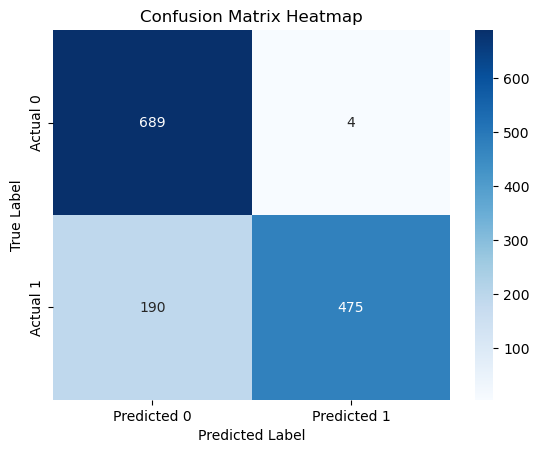

In [76]:
"""Using Support Vector Classifer"""
from sklearn.svm import SVC
svm_classifier = SVC(gamma='auto')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print('Accuracy of Support Vector classifier on test set: {:.2f}'.format(svm_classifier.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#plot
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()